In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
from PIL import Image

import pickle

import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier


In [3]:
def best_examples(df_bowed):
    df_bowed_final = pd.DataFrame()
    cols = list(df_bowed.columns[7:10])
    for i in range(0,len(cols)):
        col = cols[i]
        stats = df_bowed[col].describe()[['mean', 'std']].values
        if i == 0 :
            df_bowed_final = df_bowed[df_bowed[col].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]
            continue
        else:
            df_iter = df_bowed[df_bowed[col].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]
            df_bowed_final = pd.concat([df_bowed_final, df_iter], join='inner')
            df_iter = pd.DataFrame()
    df_bowed_final = df_bowed_final.drop_duplicates()
    return df_bowed_final

In [ ]:
df_plucked_string = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/plucked_string_instruments.csv')

In [ ]:
df_plucked_string = best_examples(df_plucked_string)

In [3]:
peaches = pd.read_csv('Peaches.csv')

In [15]:
inst_4 = "/home/jacs/Documents/DataScience/Personal/song_similarity/instrument_identification/models/keyboard_model.pkl"
with open(inst_4, 'rb') as file:
    inst_4_model = pickle.load(file)

In [6]:
instrument_type = list(instruments_reduced.keys())

In [7]:
instrument_type

['woodwind',
 'brass',
 'bowed_string_instruments',
 'plucked_string_instruments',
 'keyboard',
 'percussion',
 'singing',
 'noise']

In [9]:
scaler = StandardScaler()

In [13]:
X = scaler.fit_transform(np.array(x.iloc[:, :-1], dtype = float))
Y = inst_6_model.predict(X)
Y_name = instruments_reduced[instrument_type[4]][Y]

NameError: name 'x' is not defined

In [11]:
X_matrix = peaches[peaches['instrument_type_predicted'].apply(lambda x: x==4)]

In [12]:
peaches.iloc[:, :-3].columns

Index(['rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfccs_0', 'mfccs_1',
       'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6', 'mfccs_7',
       'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12',
       'instrument_type_predicted'],
      dtype='object')

In [76]:
plop = scaler.fit_transform(X_matrix.iloc[0,:-2].values.reshape(-1, 1))#[:,0]

In [59]:
plop

array([[-0.38940561],
       [ 1.78580592],
       [ 0.86804686],
       [ 3.40148163],
       [-0.38940561],
       [-0.60365586],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561],
       [-0.38940561]])

In [57]:
plop

array([-0.38940561,  1.78580592,  0.86804686,  3.40148163, -0.38940561,
       -0.60365586, -0.38940561, -0.38940561, -0.38940561, -0.38940561,
       -0.38940561, -0.38940561, -0.38940561, -0.38940561, -0.38940561,
       -0.38940561, -0.38940561, -0.38940561])

In [74]:
len(X_matrix.iloc[:,:-2].columns)

18

In [112]:
for x in range(0,peaches.shape[0]):
    print(inst_6_model(scaler.fit_transform(np.array(peaches.iloc[x,:-2], dtype=float))))

ValueError: Expected 2D array, got 1D array instead:
array=[   0.        0.        0.        0.        0.     -564.0776    0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'x' is not defined

In [128]:
len(peaches[peaches['mfccs_6'].apply(lambda x: x==0.0)])

17

In [119]:
peaches

,rms,spec_cent,spec_bw,rolloff,zcr,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,instrument_type_predicted,instrument_type_name
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-564.07760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,noise
1,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-564.07760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,noise
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-564.07760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,noise
3,1.156595e-14,5726.892173,3310.618119,9980.639648,0.000000,-564.07760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,singing
4,3.013355e-14,5636.735205,3203.756724,9679.174805,0.000000,-564.07760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,noise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,1.117105e-03,2128.187048,1941.466457,3617.578125,0.133301,-460.80685,65.696594,-28.021587,-13.611927,7.486486,-2.839512,-1.166629,-1.828944,-7.770325,-6.542423,-8.216579,-8.614381,-7.239151,1,brass
7318,1.174458e-03,2077.859357,1925.179261,3606.811523,0.126465,-458.93356,68.531360,-26.078667,-13.538274,8.410459,0.633437,2.172370,0.722847,-4.589847,-3.014851,-4.298756,-6.516530,-8.163893,1,brass
7319,1.145464e-03,2101.543688,2020.532042,3725.244141,0.125000,-465.07285,67.795616,-20.933617,-11.609925,12.307507,4.289395,1.476938,1.397412,-3.484148,-4.123268,-5.019330,-8.128373,-11.194332,1,brass
7320,1.011876e-03,2110.759388,2019.865083,3746.777344,0.102051,-470.53363,63.903107,-21.422382,-14.022314,8.939741,1.682859,1.026704,4.747888,0.117566,-3.852565,-7.848798,-13.510786,-16.981354,1,brass


In [131]:
X_matrix

,rms,spec_cent,spec_bw,rolloff,zcr,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,instrument_type_predicted,instrument_type_name
3,1.156595e-14,5726.892173,3310.618119,9980.639648,0.000000,-564.07760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,singing
12,2.106130e-02,6181.614943,2731.542016,9248.510742,0.545410,-315.64136,-41.111510,22.558334,17.584543,30.796047,29.681625,-7.238529,20.609600,4.666684,16.568851,12.433352,6.003268,8.820747,6,singing
16,3.156509e-04,4943.904495,3130.555964,8860.913086,0.452148,-555.53010,5.693569,-0.309217,5.830748,10.996153,5.256971,0.096686,4.447771,9.086618,4.988353,-0.267360,2.816060,7.301386,6,singing
161,5.193421e-02,3320.118236,2608.974041,6352.294922,0.270020,-114.74920,61.824097,-22.978542,16.364183,-25.916573,9.108524,-15.906714,0.945143,-1.980760,4.188730,-22.729588,10.835538,-11.904405,6,singing
162,4.083123e-02,3290.707294,2602.884426,6287.695312,0.253418,-131.31674,60.927890,-21.061210,15.915478,-30.508808,4.547114,-28.565886,-7.319231,-7.435170,1.887699,-25.210976,14.172609,-8.887466,6,singing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,4.968766e-02,2482.827398,1810.205962,4511.206055,0.163086,-144.31050,83.371070,-84.020836,10.148407,-9.057024,25.016800,-14.828281,1.520978,10.790264,0.154740,4.522187,9.669994,-6.550300,6,singing
5760,4.995284e-02,2602.875863,1902.960591,4640.405273,0.170898,-132.31422,75.864624,-76.481470,9.259155,-13.160841,26.876163,-17.406315,-3.923172,9.837364,-0.009950,-1.376455,9.138608,-6.263877,6,singing
5777,3.875104e-02,2112.954658,1624.033378,3768.310547,0.142090,-165.73398,98.973680,-92.820890,-8.297152,-23.573645,25.073925,-1.975322,-0.103445,-3.327511,0.240206,-9.108937,3.422263,-4.344016,6,singing
5778,4.118774e-02,2096.363833,1673.940856,3714.477539,0.139648,-161.82881,98.904420,-88.948610,-12.402101,-23.680307,25.857399,-6.365520,5.362111,-1.109872,0.969134,-14.479006,2.229706,-4.866431,6,singing


array([[ 1.15659530e-14,  5.72689217e+03,  3.31061812e+03,
         9.98063965e+03,  0.00000000e+00, -5.64077600e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [181]:
index_0 = peaches.index[peaches['instrument_type_predicted'] == 6].tolist()
peaches_0 = peaches[peaches['instrument_type_predicted'] == 6]

In [201]:
X =peaches.iloc[i,:]

In [203]:
X[:-2]

rms                  0.0
spec_cent    5726.892173
spec_bw      3310.618119
rolloff      9980.639648
zcr                  0.0
mfccs_0        -564.0776
mfccs_1              0.0
mfccs_2              0.0
mfccs_3              0.0
mfccs_4              0.0
mfccs_5              0.0
mfccs_6              0.0
mfccs_7              0.0
mfccs_8              0.0
mfccs_9              0.0
mfccs_10             0.0
mfccs_11             0.0
mfccs_12             0.0
Name: 3, dtype: object

In [17]:
peaches.columns

Index(['rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfccs_0', 'mfccs_1',
       'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6', 'mfccs_7',
       'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12',
       'instrument_type_predicted', 'instrument_type_name',
       'instrument_identification', 'instrument_identification_name'],
      dtype='object')

In [28]:
Y_pred = []
Y_name = []
for i in range(0,len(peaches)):
    X = peaches.iloc[i,:]
    if X['instrument_type_predicted'] == 4:
        X = X[:-5]
        X = np.array(list(X.values), dtype=float).reshape(1,-1)
        y_predo = inst_4_model.predict(X)[0]
        Y_pred.append(y_predo)
        Y_name.append(instruments_reduced[instrument_type[4]][y_predo])
#peaches_0['instrument_prediction'] = Y_pred
#peaches_0['instrument_prediction_name'] = Y_name

In [29]:
Y_name.count('Accordion')

6607

In [30]:
Y_name.count('Keyboard')

0

In [26]:
Y_pred = []
#Y_name = []
#for i in range(0,X_matrix.shape[0]):
#X = scaler.fit_transform(np.array(X_matrix.iloc[:,:-3], dtype = float))
#X = np.array(X_matrix.iloc[:,:-3])
X = np.array(list(X_matrix.iloc[0,:-3].values), dtype=float).reshape(1,-1)
Y_pred = inst_6_model.predict(X)
Y_name = [instruments_reduced[instrument_type[6]][i] for i in Y_pred]

NameError: name 'inst_6_model' is not defined

In [161]:
Y_name

['Group Singing']

In [151]:
Y_name.count('Single Voice Singing')

432

In [152]:
Y_name.count('Group Singing')

328

In [5]:
import pandas as pd
import re

In [6]:
instruments = ['Bass Tuba','French Horn','Trombone','Trumpet in C','Accordion','Cello','Contrabass','Viola','Violin','Alto Saxophone','Bassoon','Clarinet in Bb','Flute','Oboe','Guitar','Electric guitar','Acoustic guitar','Bass guitar','Tapping','Steelpan','Percussion', 'Drum and bass', 'Wind instrument', 'Bowed string instrument', 'Keyboard', 'Single Voice Singing', 'Group Singing', 'Noise']

# bowed = 23

In [10]:
route1 = '/home/jacs/Documents/DataScience/Personal/data/instruments/'
route2 = '/home/jacs/Documents/DataScience/Personal/data/'

In [11]:
instruments_reduced = {'woodwind': ['Clarinet in Bb','Flute','Oboe', 'Bassoon', 'Alto Saxophone', 'Wind Instrument'],
                       'brass':['Bass Tuba','French Horn','Trombone', 'Trumpet in C'],
                       'bowed_string_instruments': ['Cello','Viola','Violin', 'Bowed string instrument'],
                       'plucked_string_instruments':['Guitar','Electric guitar','Acoustic guitar', 'Tapping', 'Bass guitar','Contrabass'],
                       'keyboard': ['Keyboard','Accordion'],
                       'percussion': ['Steelpan','Percussion', 'Drum and bass'],
                       'singing': ['Single Voice Singing', 'Group Singing'],
                       'noise': ['Noise']}

In [12]:
j = 0
for typs in instruments_reduced:
    df_typs = pd.DataFrame([])
    typs2 = instruments_reduced[typs]
    for instru in typs2:
        instrument_lower = re.sub(' ','_',str(instru)).lower()
        df1 = pd.read_csv(route1 + instrument_lower+'.csv')
        df_typs = pd.concat((df_typs,df1),axis=0)
    df_typs['instrument_type'] = [j]*len(df_typs)
    df_typs['instrument_type_name'] = [typs]*len(df_typs)
    try:
        df_typs.drop(['Unnamed: 0'], axis=1)
        df_typs.to_csv(route2 + typs+'.csv')
        j +=1
    except:
        df_typs.to_csv(route2 + typs+'.csv')
        j +=1
    print(typs2)

['Clarinet in Bb', 'Flute', 'Oboe', 'Bassoon', 'Alto Saxophone', 'Wind Instrument']
['Bass Tuba', 'French Horn', 'Trombone', 'Trumpet in C']
['Cello', 'Viola', 'Violin', 'Bowed string instrument']
['Guitar', 'Electric guitar', 'Acoustic guitar', 'Tapping', 'Bass guitar', 'Contrabass']
['Keyboard', 'Accordion']
['Steelpan', 'Percussion', 'Drum and bass']
['Single Voice Singing', 'Group Singing']
['Noise']


In [9]:
for i in range(len(instruments)-1,len(instruments)):
    instrument = instruments[i]
    print(instrument)
    instrument_lower = re.sub(' ','_',str(instrument)).lower()
    df1 = pd.read_csv(route1 + instrument_lower+'.csv')
    df1['instrument'] = [i] * len(df1)
    df1['instrument_name'] = [instrument_lower] * len(df1)
    try:
        df1 = df1.drop(['Unnamed: 0'], axis=1)
        df1.to_csv(route1 + instrument_lower+'.csv',  index=False)
    except:
        df1.to_csv(route1 + instrument_lower+'.csv',  index=False)

Noise


In [43]:
[typs]*2

['noise', 'noise']

Text(0, 0.5, 'mfccs_0')

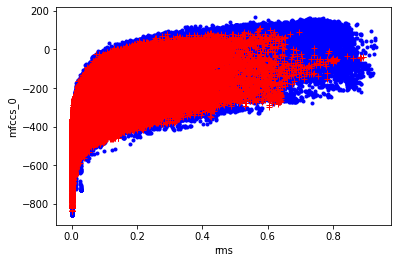

In [2]:
linko1 = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/trumpet_in_c/database_trumpet_in_c_cepstrum_features.csv'
linko2 = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/alto_saxophone/database_alto_saxophone_cepstrum_features.csv'

linko1 = '/home/jacs/Documents/DataScience/Personal/song_similarity/data/trumpet_in_c.csv'
linko2 = '/home/jacs/Documents/DataScience/Personal/song_similarity/data/french_horn.csv'


df_trumpet = pd.read_csv(linko1)
df_sax = pd.read_csv(linko2)

#df_final2['mfccs_0'].describe()

plt.plot(df_trumpet['rms'],df_trumpet['mfccs_0'], '.b')
plt.plot(df_sax['rms'],df_sax['mfccs_0'], '+r')
plt.xlabel('rms')
plt.ylabel('mfccs_0')

In [3]:
df_trumpet['instrument'] = np.zeros(len(df_trumpet['instrument']))
df_trumpet['instrument'] = df_trumpet['instrument'].apply(lambda x: int(x))
df_sax['instrument'] = np.ones(len(df_sax['instrument']))
df_sax['instrument'] = df_sax['instrument'].apply(lambda x: int(x))

In [4]:
features = df_sax[df_sax.columns[1:19]]

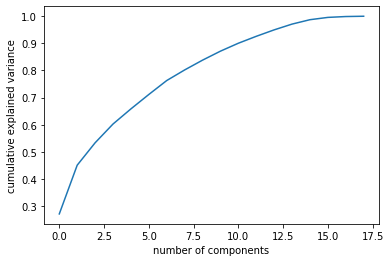

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
X = scale(features)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
df_trumpet = shuffle(df_trumpet)
df_sax = shuffle(df_sax)

In [26]:
df_trumpet_2 = df_trumpet[:int(0.1*len(df_trumpet))]
df_sax_2 = df_sax[:int(0.1*len(df_sax))]

In [27]:
df_final = pd.concat((df_trumpet_2, df_sax_2), axis=0)

In [28]:
df_final.columns

Index(['Unnamed: 0', 'index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr',
       'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5',
       'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11',
       'mfccs_12', 'instrument', 'note_played'],
      dtype='object')

In [29]:
df_final.iloc[:, -2]

79135     0
460346    0
190422    0
738519    0
295152    0
         ..
82282     1
212299    1
186218    1
210408    1
90902     1
Name: instrument, Length: 107637, dtype: int64

In [30]:
df_final = shuffle(df_final)

In [31]:
instru_list = df_final.iloc[:, -2]

encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df_final.iloc[:, :-2], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

SVM

In [32]:
svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1)
svclassifier.fit(X_train, y_train)
predicted_labels = svclassifier.predict(X_test)
#svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1, degree = 3)

In [33]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, predicted_labels))

Recall:  [0.95803665 0.82271279]
Precision:  [0.9546935  0.83410245]
F1-Score:  [0.95636215 0.82836847]
Accuracy: 0.93  , 20030
Number of samples: 21528
[[16415   719]
 [  779  3615]]


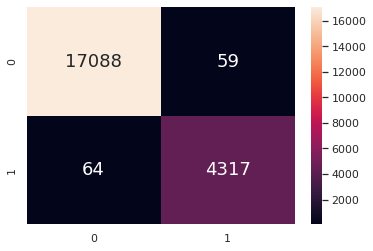

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels))#,index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

In [ ]:


import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_model_2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svclassifier, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Test score: {0:.2f} %".format(100 * score))
#Ypredict = pickle_model.predict(Xtest)



In [18]:
df_final.iloc[:, :-2] = scaler.fit_transform(np.array(df_final.iloc[:, :-2], dtype = float))
df_final.iloc[:, -2] = encoder.fit_transform(df_final.iloc[:, -2])
df_final

,Unnamed: 0,index,rms,spec_cent,spec_bw,rolloff,zcr,mfccs_0,mfccs_1,mfccs_2,...,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,instrument,note_played
37660,0.052858,1.126054,1.318371,1.068314,1.269514,1.036317,0.244621,1.506661,-0.818258,0.253190,...,0.610181,-0.293242,-0.580044,-1.233647,1.700724,-1.176276,0.745427,-0.950376,0,Acoustic_Brass_Bal_Caritas_2009
73649,1.455095,0.965087,-0.946454,1.114149,0.678826,0.667945,1.562129,-0.001633,-0.999528,-1.241507,...,0.418403,-0.853193,0.880504,0.388628,0.910888,0.115239,0.932979,-0.235843,0,Blues_Sky_Schiller_BigBand_2009
26694,-0.374409,-1.666723,0.312173,-0.194114,-0.959649,-0.489793,0.041927,-0.004309,0.050869,-2.374903,...,-0.815143,1.301170,-0.939740,0.563351,-1.840339,-0.280339,-0.147821,-0.406327,0,Telephone_Lady_Gaga_played_on_the_Trumpet_by_S...
63772,1.070258,1.254827,0.567620,0.609384,0.998498,0.871865,-0.114700,1.155639,-0.689760,0.095220,...,-0.172232,-0.883783,0.072755,0.111845,-0.272549,-0.207422,0.092856,-1.407330,0,ΚΛΑΡΙΝΑ_LIVE_2013_ME_THN_ΜΑΡΙΑ_ΛΩΛΛΟΥ
30631,-0.221012,0.055623,0.600871,0.796843,1.641828,1.181034,0.014287,1.465529,-0.634131,0.698969,...,0.023387,0.244877,-0.186756,-0.638683,0.001921,-0.573309,-0.718491,-1.602727,0,Get_It_On_HCS_Jazz_Band_at_the_Westin_2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,-1.202838,0.369509,-0.286213,-0.985572,-1.251881,-0.838430,-0.907048,-0.201435,1.737002,-0.333903,...,-1.224864,0.320177,1.074299,0.253663,-0.542398,-0.765513,-1.242232,-0.377711,1,MANTOVANI_TEA_FOR_TWO
81657,1.767110,-0.491664,2.544343,1.559970,1.017513,1.444156,1.294942,0.219763,-2.396992,0.400745,...,0.363846,-0.047444,2.672749,2.767327,3.427383,2.658375,-2.635997,-2.330989,0,Maria_Maynard_Ferguson_Cover
1620,-1.351365,0.908748,-0.821114,-1.253826,-1.422904,-1.101552,-0.842554,-1.273208,0.999047,2.502019,...,-0.064617,0.088696,0.369682,1.403643,0.426623,0.555733,0.690242,0.639923,1,BrasSolist
21500,-0.576782,1.447988,3.080494,-1.098512,-1.082663,-1.173911,-1.008394,-0.297699,0.155325,1.112428,...,-1.063809,-0.051894,-0.777501,-0.124918,-0.207126,0.191248,0.381364,-0.329701,1,Kadenz_von_Mozart_3._Hornkonzert_KV_447_von_Ar...


In [ ]:
scores = cross_val_score(svclassifier, X, y, cv=10, scoring='accuracy')

np.mean(scores)



# Random Forest

In [22]:
RFClassifier = RandomForestClassifier(n_estimators=500, random_state=1993, max_depth=18)
RFClassifier.fit(X_train, y_train)
predicted_labels = RFClassifier.predict(X_test)
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )
print("Number of samples:",y_test.shape[0])
confusion_matrix(y_test, predicted_labels)

Recall:  [0.99650085 0.97078293]
Precision:  [0.99256462 0.98608857]
F1-Score:  [0.99452884 0.97837589]
Accuracy: 0.99  , 21340
Number of samples: 21528


array([[17087,    60],
       [  128,  4253]])

In [ ]:
pkl_filename = "instrument_type_model.pkl"

with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
    
instru_list = df_final.iloc[:, -2]

encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df_final.iloc[:, :-2], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Test score: {0:.2f} %".format(100 * score))

pickle_model.predict(X_test)